# Example 2: DIODE CIRCUIT

***Authors:*** Sania Dolat, Ali Saadatpour
 
***Contacts:***  qstzen@proton.me, its.saniadlt@gmail.com

## Brief overview of the diode

### What is diode?

A diode is a semiconductor device that allows current to flow in one direction while blocking it in the opposite direction. The fundamental operation of a diode is based on the behavior of charge carriers in semiconductors, typically made from silicon or germanium.

### Diode Application

1. Forward Bias: When a positive voltage is applied to the anode and a negative voltage to the cathode, the diode becomes forward-biased. The potential barrier is reduced, allowing charge carriers (holes from the p-side and electrons from the n-side) to recombine and flow through the diode. This results in current flow.

2. Reverse Bias: When the voltage is reversed (negative at the anode and positive at the cathode), the potential barrier increases. This prevents current from flowing through the diode, effectively blocking it. A small reverse saturation current may flow, but it is typically negligible.

3. Breakdown Voltage: If the reverse voltage exceeds a certain threshold (breakdown voltage), the diode can enter a breakdown region. In certain types of diodes (like Zener diodes), this behavior is utilized for voltage regulation.



## Start Programming 
In this example we want to implement a simple diode curcuit and analyse its current 
Run the cell below to see the circuit for implementation

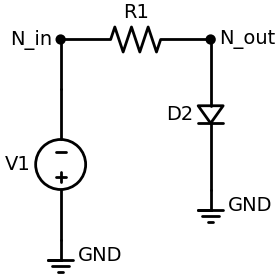

In [41]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    
    d += elm.SourceV().down().label('V1').at([0, 0])  # Add the voltage source V1
    
    d += elm.Ground().label('GND',loc='right').at([0, -3]) # Add the ground symbol for V1
    
    d += elm.Dot().label('N_in', loc='left').at([0,1]) # Add the node for N_in
    
    d += elm.Resistor().right().label('R1').at([0,1]) # Add resistor R1
    
    d += elm.Dot().label('N_out', loc='right') # Add the node for N_out
    
    d += elm.Diode().down().label('D1') # Add the diode D1
    
    d += elm.Ground().label('GND', loc='right') # Add the ground for the diode
    
    d += elm.Line().up().at([0, 0]).length(1) # Draw the connection between the voltage source and the resistor



## Note 1
Logging information about the simulation.  
**This shoud be always imported.**

In [20]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

In [21]:
from PySpice.Spice.Netlist import Circuit  #used for creating circuit
from PySpice.Unit import *  #used for unit usages like ohm, volt, etc
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import SubCircuit
from PySpice.Spice.Simulation import *

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Styling the Output
For styling the output circuit we use the code below

In [23]:
matplotlib.rcParams.update({'font.size': 14,
                            'text.usetex': True,
                            'mathtext.fontset': 'cm',
                            'mathtext.rm': 'serif'})

### Make an instance of Diode Circuit

In [24]:
circuit = Circuit('Diode Circuit')

### Add the components to the given circuit

In [25]:
circuit.V('1','n_in',circuit.gnd,0@u_V)
circuit.R(1,'n_in','n_out',1@u_kOhm)
print(circuit)

.title Diode Circuit
V1 n_in 0 0V
R1 n_in n_out 1kOhm



## Note 2
We need to make a diode sample and then add that to the circuit. There are different ways to make the diode sample, but in this example we use one technique:

Define the model using PySpice

In [26]:
circuit.model('1N4148', 'D', IS = 4.352E-9, N = 1.906,
              BV = 110, IBV = 0.0001, RS = 0.6458, CJO=7.048E-13,
              VJ = 0.869, M = 0.03, FC = 0.5, TT=3.48E-9)

<class 'PySpice.Spice.Netlist.DeviceModel'> 1N4148

In [27]:
circuit.D(1,'n_out',circuit.gnd,model='1N4148') # Add the model to the given circuit
print(circuit)

.title Diode Circuit
V1 n_in 0 0V
R1 n_in n_out 1kOhm
D1 n_out 0 1N4148
.model 1N4148 D (BV=110 CJO=7.048e-13 FC=0.5 IBV=0.0001 IS=4.352e-09 M=0.03 N=1.906 RS=0.6458 TT=3.48e-09 VJ=0.869)



### After creating the circuit we need to do the dc sweep

In [30]:
simulator = circuit.simulator(temperature = 25 , nominal_temperature = 25)
analysis = simulator.dc(V1=slice(0,1,0.001))

In [31]:
current_name = str(analysis['V1'])
current_value = np.array(analysis['V1'])

### Plotting the Diode current as the voltage changes

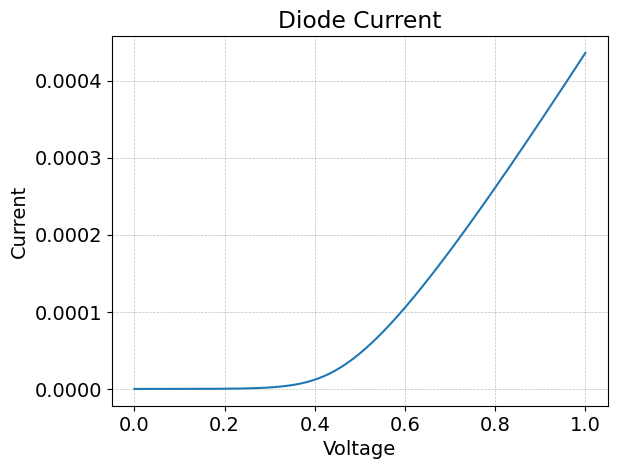

In [32]:
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots()

ax.set(xlabel="Voltage", ylabel="Current", title="Diode Current")
ax.grid(color='gray', alpha=0.5, linestyle='dashed', linewidth=0.5)

x = np.linspace(0,1,len(current_value))
ax.plot(x, -current_value)

plt.show()

## Characteristic Explaining

The curve shows the typical exponential behavior of a diode in forward bias. Diodes, such as silicon or germanium diodes, exhibit an exponential increase in current as the forward voltage exceeds a certain threshold.

**Low Voltage Region (0V - ~0.4V):**  
In the range from 0 to approximately 0.4V, the current is very low, which is typical of a diode that is not fully forward-biased. In this region, the diode is still "off" or only slightly conducting, leading to very small leakage currents.

**Turn-On Region (~0.5V - ~0.7V):**  
Around 0.5V and above, the current begins to rise more significantly. This is where the diode reaches its threshold or "cut-in" voltage (typically around 0.7V for a silicon diode). At this point, the diode starts conducting more current, indicating it's in the forward bias mode.

**Saturation/Conducting Region (Above ~0.7V):**  
As the voltage increases beyond the threshold (around 0.7V), the current rises steeply, showing the diode is fully conducting. This is the exponential growth phase, where even small increases in voltage lead to large increases in current.


### Mathematical Relationship:
The diode current $I_{D}$ is given by the diode equation:

$$
I_D = I_S \left( \exp\left(\frac{V_D}{nV_T}\right) - 1 \right)
$$

Where:

- $I_{D}$ is the diode current,
- $I_{S}$ is the reverse saturation current (a very small value),
- $V_{D}$ is the voltage across the diode,
- $V_{T}$ is the thermal voltage (approximately 26 mV at room temperature),
- $n$ is the ideality factor (typically between 1 and 2).

As $V_{D}$ increases beyond the threshold voltage (about 0.7V for silicon diodes), the exponential term becomes dominant, leading to a rapid increase in current, as shown in your graph.
